# Explore here

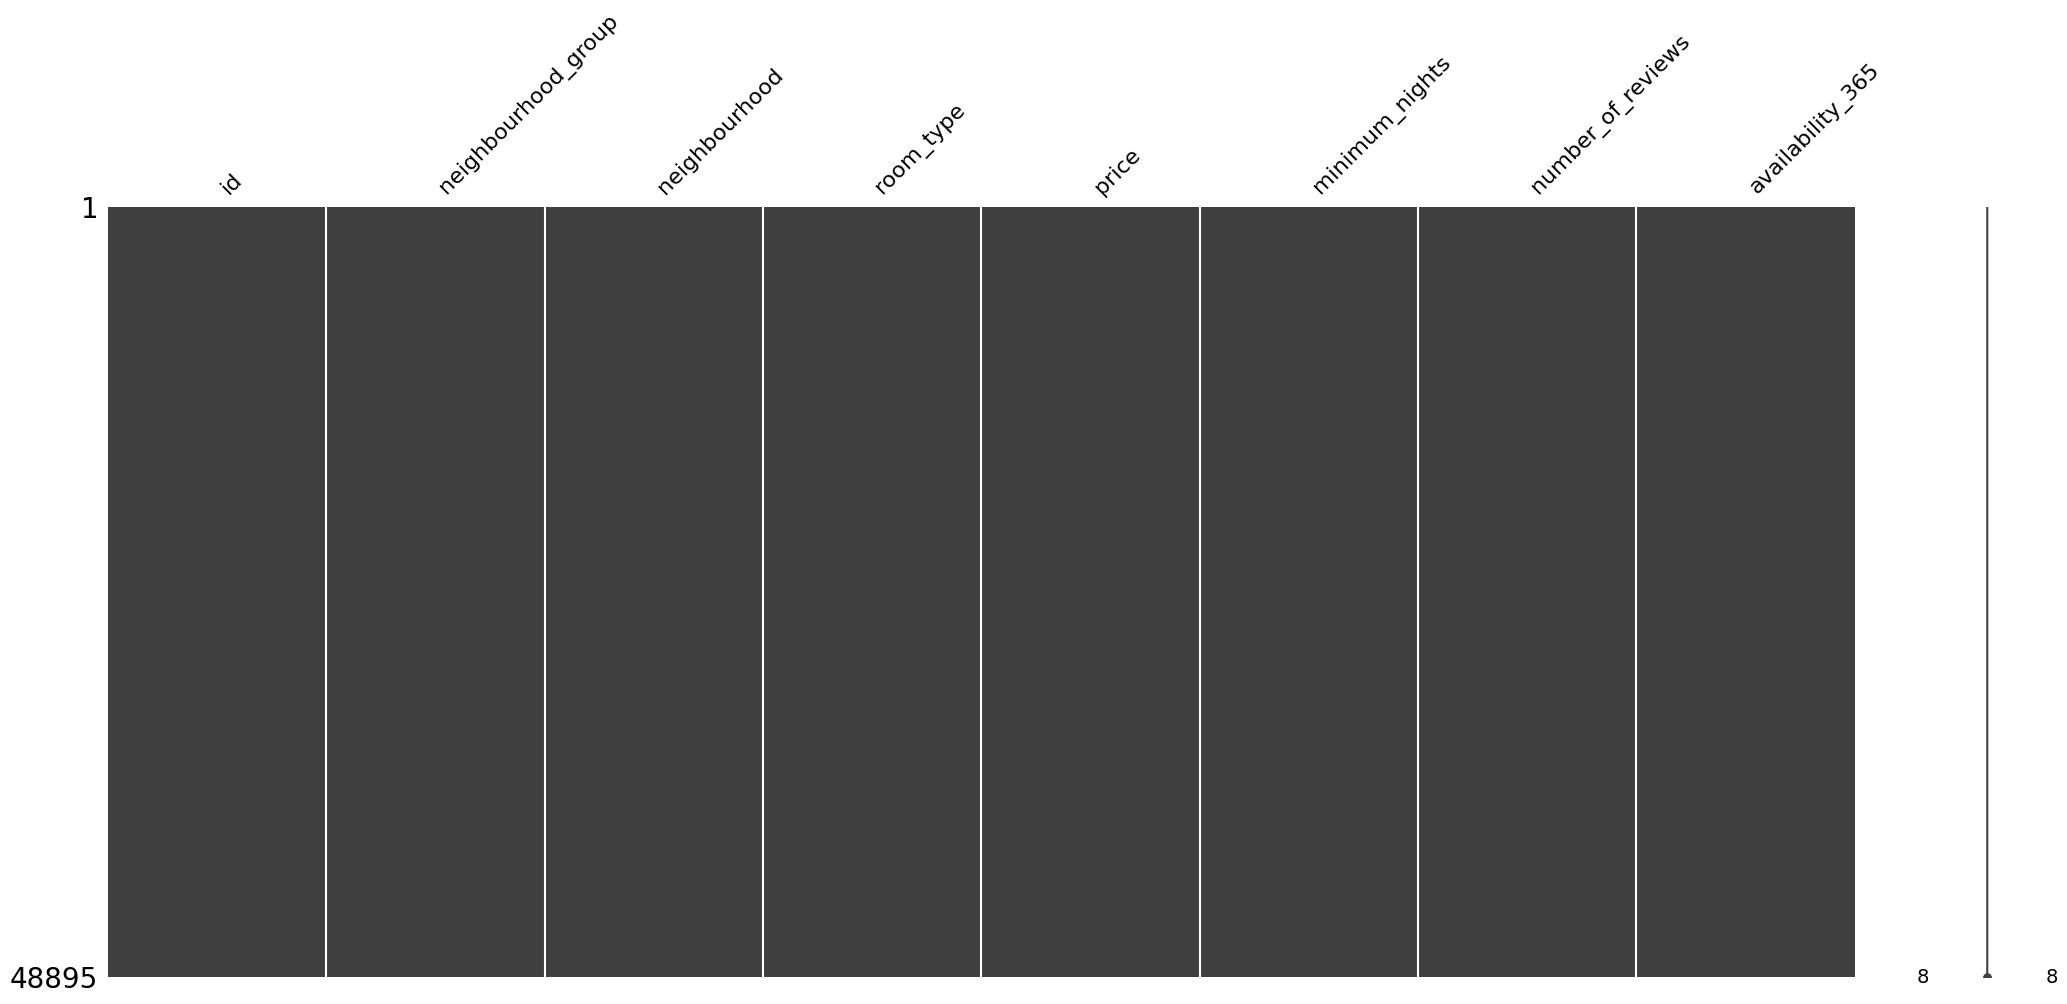

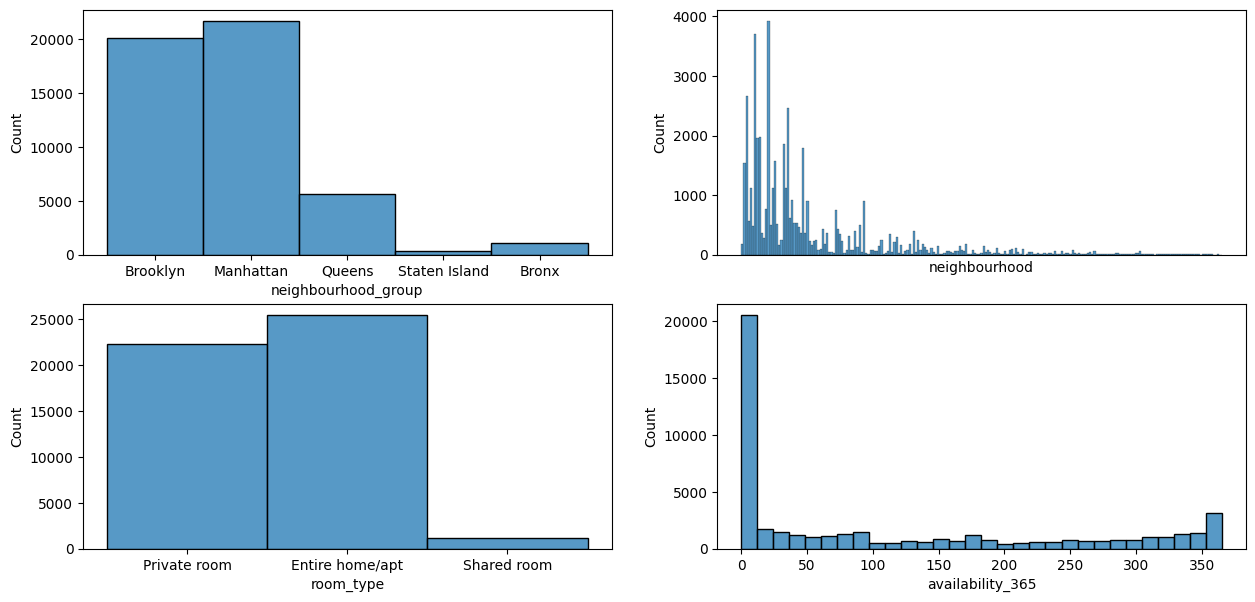

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


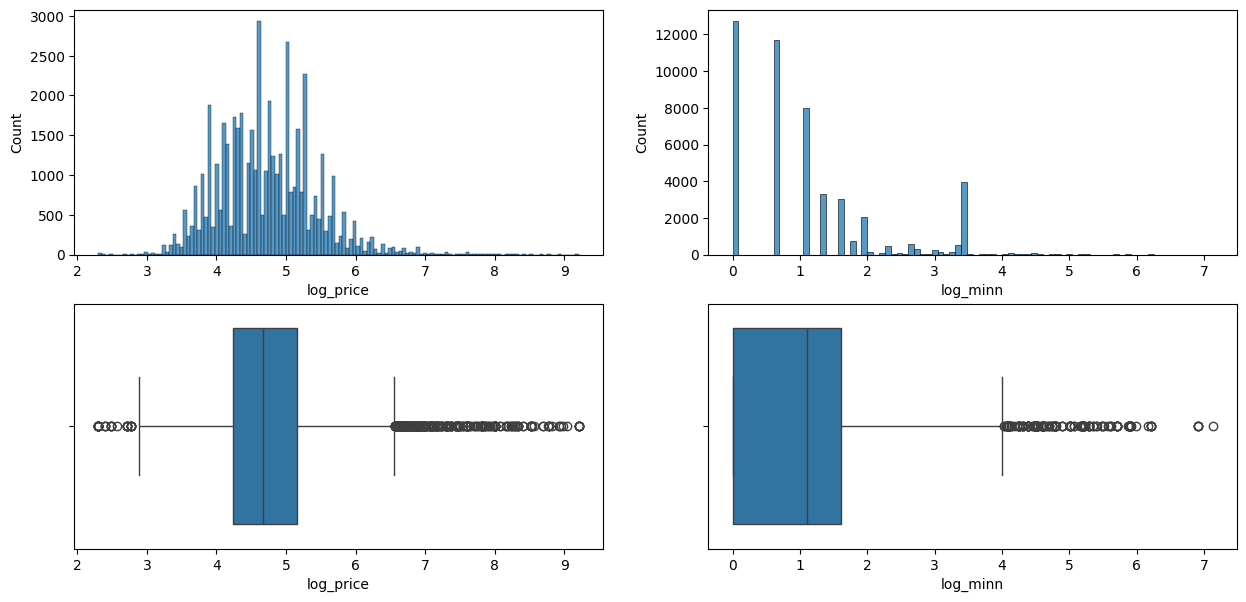

In [65]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno 
import seaborn as sns

datos = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
#datos.head()



#datos.info()
#datos.nunique()

#Con datos.info() ya veo que hay varias columnas con Nans: name, host_name, last_review y reviews_per_month.

datos_util = datos.drop(["name", "host_id", "latitude", "longitude", "host_name", "last_review", "reviews_per_month", "calculated_host_listings_count"], axis = 1)

#datos_util.info()

#Como todas las columnas tienen 48895 entradas, no tengo que revisar que hayan valores vacíos, pero lo compruebo:

msno.matrix(datos_util)

#Confirmado 

datos_util.nunique()
#Representación de variables no numéricas 

fig, axis = plt.subplots(2, 2, figsize=(15, 7))


sns.histplot(ax = axis[0,0], data = datos_util, x = "neighbourhood_group")
sns.histplot(ax = axis[0,1], data = datos_util, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = datos_util, x = "room_type")
sns.histplot(ax = axis[1,1], data = datos_util, x = "availability_365")
plt.show()

#Representación de variables numéricas 
datos_util["log_price"]=np.log(datos.price)
datos_util["log_minn"]=np.log(datos.minimum_nights)


fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = datos_util, x = "log_price")
sns.boxplot(ax = axis[1, 0], data = datos_util, x = "log_price")

sns.histplot(ax = axis[0, 1], data = datos_util, x = "log_minn")
sns.boxplot(ax = axis[1, 1], data = datos_util, x = "log_minn")


plt.show()


